### Import the libraries

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

### Read the file

In [59]:
cm=pd.read_csv('Churn_Modelling.csv')

### Showing the first 5 rows

In [61]:
cm.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Showing information of dataset

In [62]:
cm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### Showing the Statistical Summary

In [63]:
cm.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### Drop Unneeded Columns

In [64]:
cm.drop(columns='RowNumber',inplace=True)

In [65]:
cm.drop(columns='CustomerId',inplace=True)

In [66]:
cm.drop(columns='Surname',inplace=True)

### Checking for missing values

In [67]:
cm.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Checking for duplicated values

In [68]:
cm.duplicated().sum()

np.int64(0)

### Box Plots for detecting outliers on (Balance , EstimatedSalary)

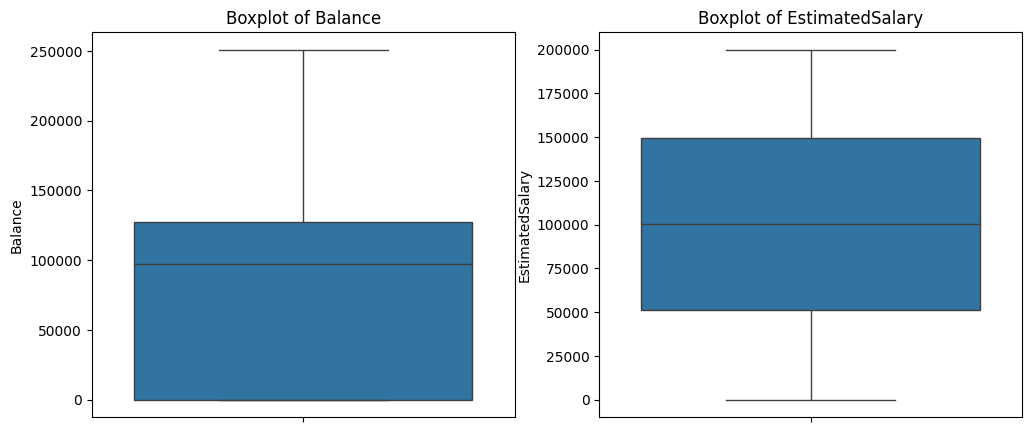

In [69]:
# Boxplots for Balance and EstimatedSalary
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=cm["Balance"])
plt.title("Boxplot of Balance")

plt.subplot(1, 2, 2)
sns.boxplot(y=cm["EstimatedSalary"])
plt.title("Boxplot of EstimatedSalary")

plt.show()

### Box Plots for detecting outliers on (Age , CreditScore , Tenure , NumOfProducts , HasCRCard , IsActiveMember)

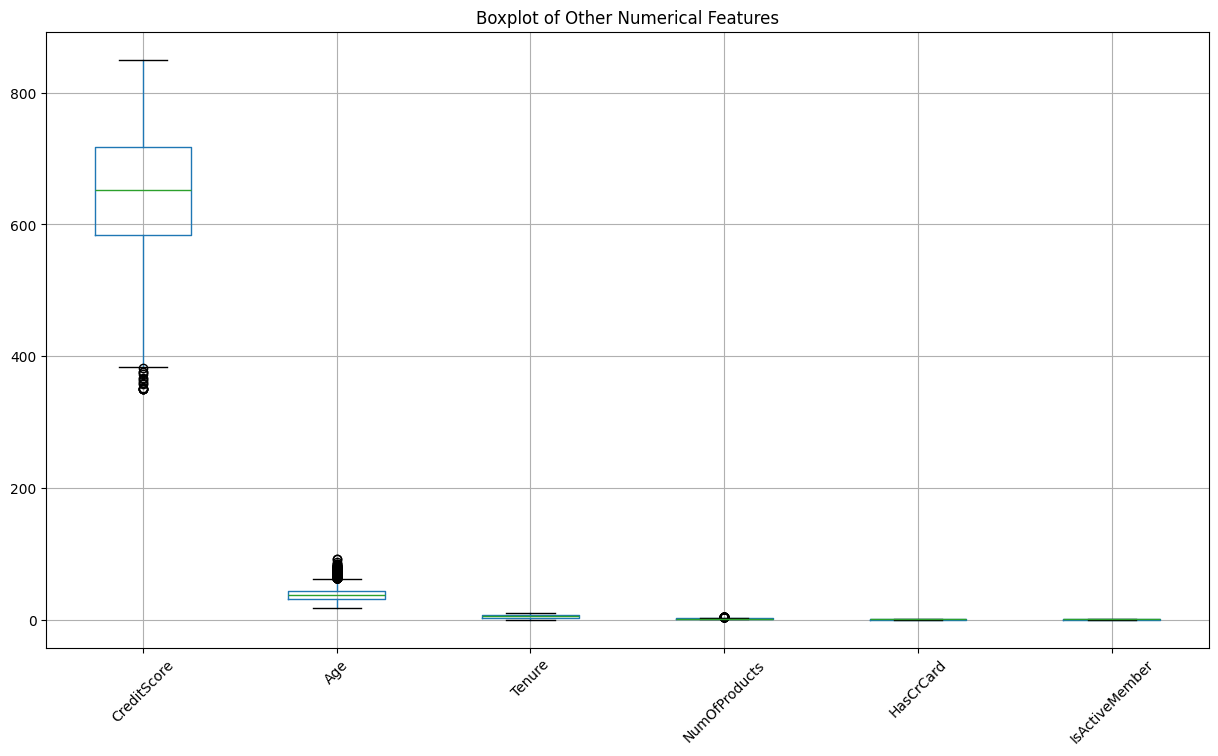

In [70]:
# Select numerical columns 
numerical_cols = cm.select_dtypes(include=['int64', 'float64']).columns
numerical_cols = [col for col in numerical_cols if col not in ["Balance", "EstimatedSalary","Exited"]]

# Boxplot for remaining numerical columns
plt.figure(figsize=(15, 8))
cm[numerical_cols].boxplot()
plt.xticks(rotation=45)
plt.title("Boxplot of Other Numerical Features")
plt.show()

### Capping the outliers

In [71]:
# Function to cap outliers using the IQR method
def cap_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data[column] = data[column].clip(lower=lower_bound, upper=upper_bound)

# Apply capping to handle outliers
columns_to_cap = ["CreditScore", "Age", "NumOfProducts"]
for col in columns_to_cap:
    cap_outliers(cm, col)

print("Outliers have been handled successfully!")

Outliers have been handled successfully!


### After Handling the outliers

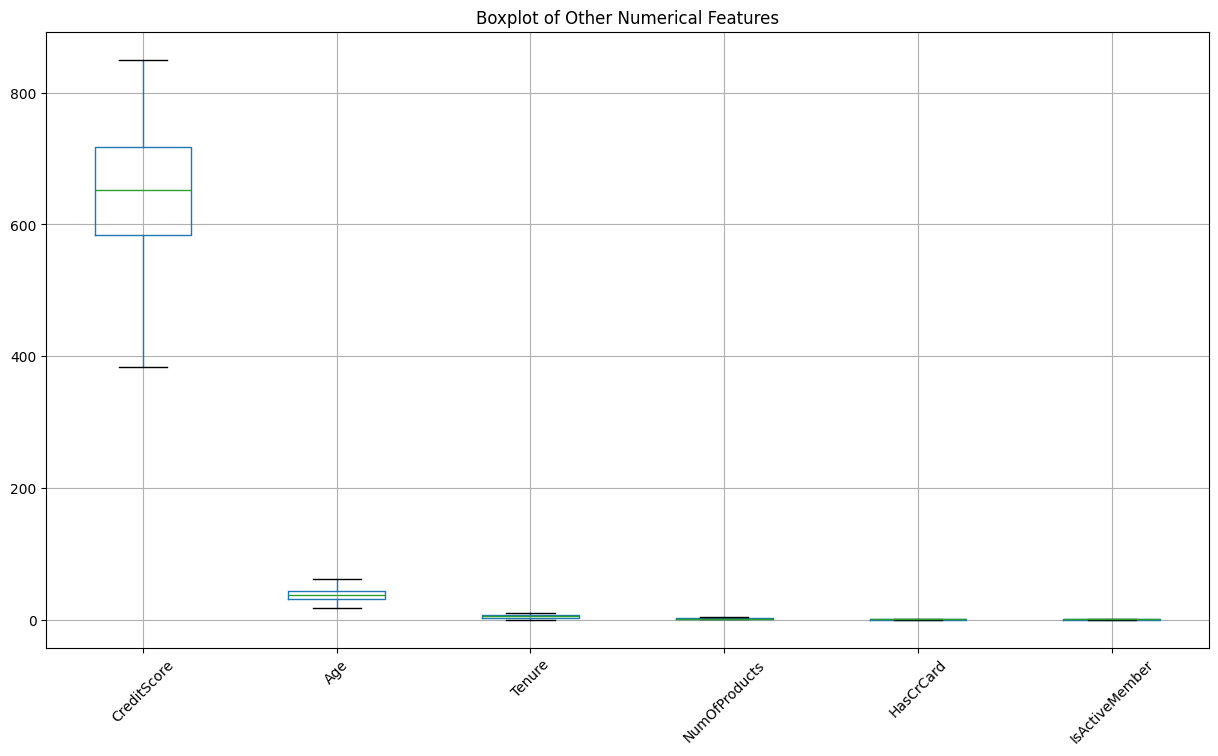

In [72]:
# Select numerical columns 
numerical_cols = cm.select_dtypes(include=['int64', 'float64']).columns
numerical_cols = [col for col in numerical_cols if col not in ["Balance", "EstimatedSalary","Exited"]]

# Boxplot for remaining numerical columns
plt.figure(figsize=(15, 8))
cm[numerical_cols].boxplot()
plt.xticks(rotation=45)
plt.title("Boxplot of Other Numerical Features")
plt.show()

### Pairplot of selected important features

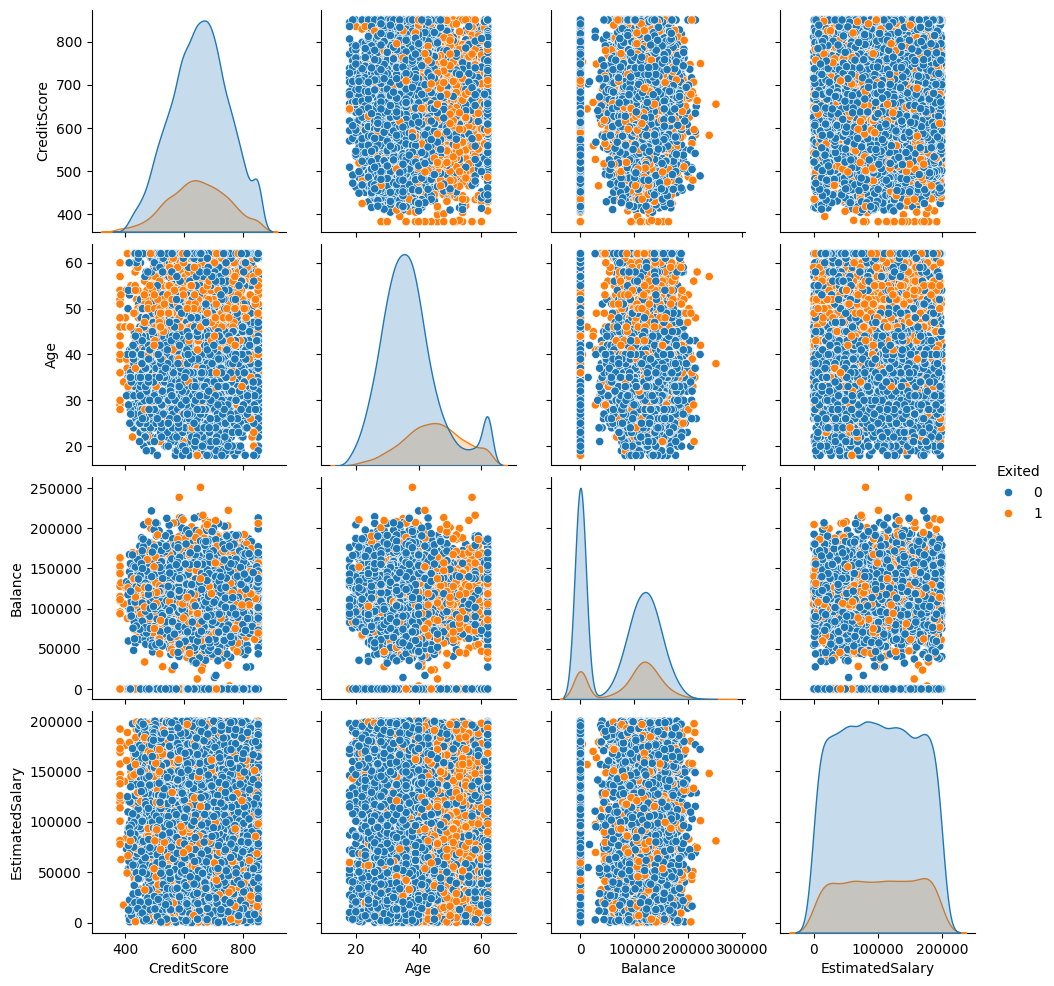

In [75]:
sns.pairplot(cm, vars=["CreditScore", "Age", "Balance", "EstimatedSalary"], hue="Exited")
plt.show()

### Countplots for categorical variables

C:\Users\UAS\AppData\Local\Temp\ipykernel_3432\1322607127.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=cm[col], palette="Set1")
C:\Users\UAS\AppData\Local\Temp\ipykernel_3432\1322607127.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=cm[col], palette="Set1")
C:\Users\UAS\AppData\Local\Temp\ipykernel_3432\1322607127.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=cm[col], palette="Set1")
C:\Users\UAS\AppData\Local\Temp\ipykernel_3432\1322607127.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is depr

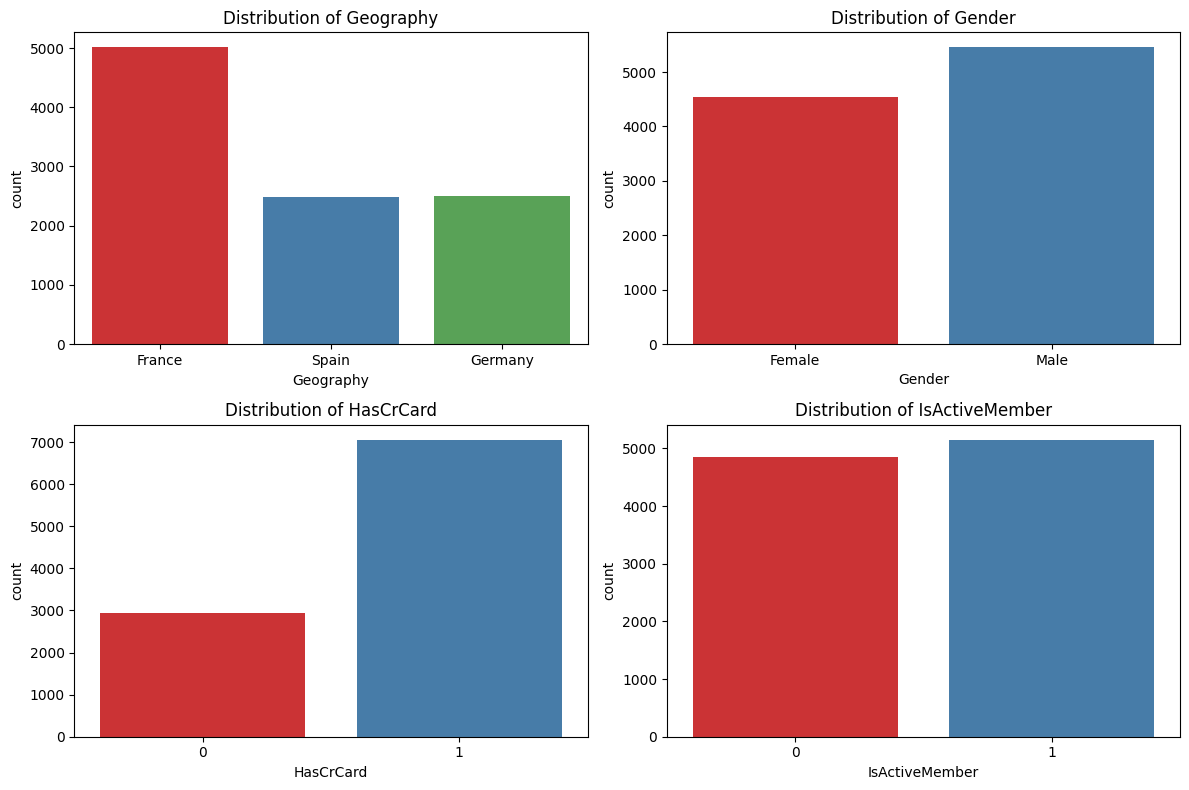

In [77]:
categorical_cols = ["Geography", "Gender", "HasCrCard", "IsActiveMember"]
plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=cm[col], palette="Set1")
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

### Countplots for categorical variables

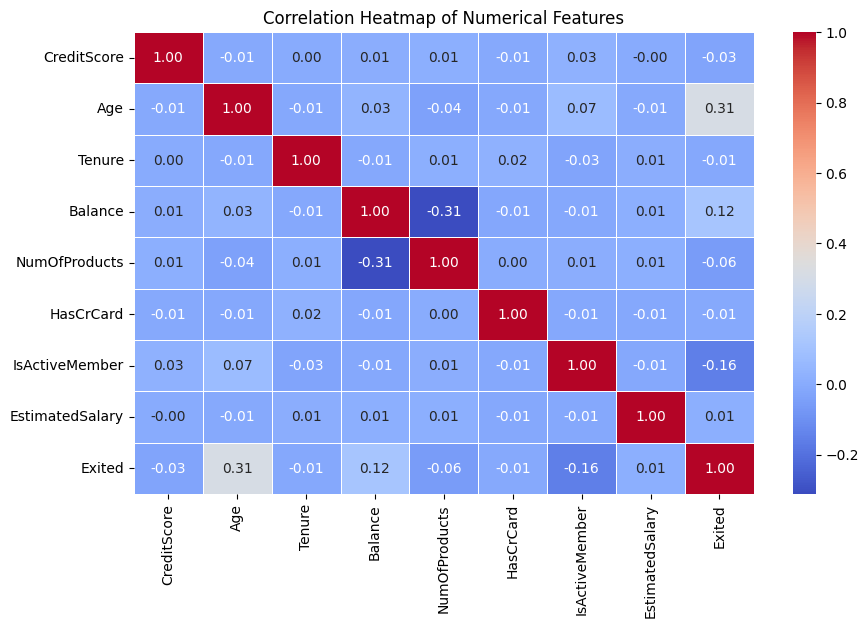

In [84]:
# Select only numerical columns
numerical_df = cm.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()